# Analysis notebook for Quasilinear Diffusion calculation

Allows you to check the output, and compare cases with/without fluctuation to the C3PO/LUKE output for the same setup.

## Imports and data setup

In [1]:
#pip install nbformat
#pip install plotly --upgrade

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import h5py
from scipy.interpolate import RegularGridInterpolator
from scipy.io import loadmat

#%matplotlib widget 
#for interactive plot, uncomment line above.

from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)
parula_map.set_under(cm_data[0])

In [2]:
filename_nofluct        = '/home/devlamin/WKbeam_simulations/TCV_85355_0.9_nofluct/output/QLdiff_nofluct.h5'
filename_fluct          = '/home/devlamin/WKbeam_simulations/TCV_85355_0.9_nofluct/output/QLdiff_nofluct.h5'

matlab_file         = '/home/devlamin/WKbeam_simulations/TCV_85355_0.9_nofluct/output/Drf_data.mat'


In [3]:
mat = loadmat(matlab_file)['Drf_data']
Drf_mat = mat['dat'][0,0]
rho_mat = mat['rhoP'][0,0][0]
Pnorm_mat = mat['PP'][0,0]
Ksi0_mat = mat['MHU'][0,0]
Ppar_mat, Pper_mat = Pnorm_mat*Ksi0_mat, Pnorm_mat*np.sqrt(1-Ksi0_mat**2)
print(Drf_mat.shape, rho_mat.shape, Pnorm_mat.shape, Ksi0_mat.shape)

max_mat = np.max(Drf_mat)
min_mat = np.min(Drf_mat)
print(max_mat, min_mat)

(120, 142, 20) (20,) (142, 120) (142, 120)
0.7796242983313277 0.0


In [4]:
file_nofluct = h5py.File(filename_nofluct, 'r')
file_fluct = h5py.File(filename_fluct, 'r')
# Read the data

# First read the absorption profiles
rho_abs_nofluct = file_nofluct['rho_abs'][()]
dP_drho_nofluct = file_nofluct['dP_drho'][()]
rho_abs_fluct = file_fluct['rho_abs'][()]
dP_drho_fluct = file_fluct['dP_drho'][()]
# Select the wanted grid
grid = 'wh'
dataname = 'DRF0_' + grid

psi = file_nofluct['psi'][()]
p_norm_w = file_nofluct['p_norm_w'][()]
p_norm_h = file_nofluct['p_norm_h'][()]
ksi0_w = file_nofluct['ksi0_w'][()]
ksi0_h = file_nofluct['ksi0_h'][()]
harmonics = file_nofluct['harmonics'][()]

Trapksi0_w = file_nofluct['Trapksi0_w'][()]
Trapksi0_h = file_nofluct['Trapksi0_h'][()]

QL_bounce_sparse = file_nofluct[dataname + '_sparse'][()]
QL_mask = file_nofluct['mask_'+dataname][()]

file_nofluct.close()

psi_fluct = file_fluct['psi'][()]
p_norm_w_fluct = file_fluct['p_norm_w'][()]
p_norm_h_fluct = file_fluct['p_norm_h'][()]
ksi0_w_fluct = file_fluct['ksi0_w'][()]
ksi0_h_fluct = file_fluct['ksi0_h'][()]
harmonics_fluct = file_fluct['harmonics'][()]

Trapksi0_w_fluct = file_fluct['Trapksi0_w'][()]
Trapksi0_h_fluct = file_fluct['Trapksi0_h'][()]

QL_bounce_sparse_fluct = file_fluct[dataname + '_sparse'][()]
QL_mask_fluct = file_fluct['mask_'+dataname][()]

file_fluct.close()



if grid == 'wh':
    p_norm = p_norm_w
    ksi0 = ksi0_h
    Trapksi0 = Trapksi0_h

    p_norm_fluct = p_norm_w_fluct
    ksi0_fluct = ksi0_h_fluct
    Trapksi0_fluct = Trapksi0_h_fluct

elif grid == 'hw':
    p_norm = p_norm_h
    ksi0 = ksi0_w
    Trapksi0 = Trapksi0_w

    p_norm_fluct = p_norm_h_fluct
    ksi0_fluct = ksi0_w_fluct
    Trapksi0_fluct = Trapksi0_w_fluct

else:
    p_norm = p_norm_h
    ksi0 = ksi0_h
    Trapksi0 = Trapksi0_h

    p_norm_fluct = p_norm_h_fluct
    ksi0_fluct = ksi0_h_fluct
    Trapksi0_fluct = Trapksi0_h_fluct

# Check if these are the same

if np.all(psi_fluct == psi) and np.all(p_norm_fluct == p_norm) and np.all(ksi0_fluct == ksi0) and np.all(harmonics_fluct == harmonics):
    print('The fluctuating and non-fluctuating data are the same')
else:
    print('The fluctuating and non-fluctuating data are different')
    print('psi: ', np.all(psi_fluct == psi))
    print('p_norm: ', np.all(p_norm_fluct == p_norm))
    print('ksi0: ', np.all(ksi0_fluct == ksi0))
    print('harmonics: ', np.all(harmonics_fluct == harmonics))
    plt.figure(figsize=(15, 5))
    ax = plt.subplot(131)
    plt.plot(psi_fluct.flatten(), label='fluctuating')
    plt.plot(psi.flatten(), label='non-fluctuating')
    plt.legend()
    ax = plt.subplot(132)
    plt.plot(p_norm_fluct.flatten(), label='fluctuating')
    plt.plot(p_norm.flatten(), label='non-fluctuating')
    plt.legend()
    ax = plt.subplot(133)
    plt.plot(ksi0_fluct.flatten(), label='fluctuating')
    plt.plot(ksi0.flatten(), label='non-fluctuating')
    plt.legend()
    plt.show()

p_max = np.max(p_norm)
rho_max = np.max(np.sqrt(psi))
print(f'nofluct sparse:{QL_bounce_sparse.shape}')
print(f'fluct sparse:{QL_bounce_sparse_fluct.shape}')
print(f'Percentage filled nofluct:{QL_bounce_sparse.shape[0]/(psi.shape[0]*p_norm.shape[0]*ksi0.shape[0]*harmonics.shape[0]):.2f}')
print(f'Percentage filled fluct:{QL_bounce_sparse_fluct.shape[0]/(psi_fluct.shape[0]*p_norm_fluct.shape[0]*ksi0_fluct.shape[0]*harmonics_fluct.shape[0]):.2f}')
print(f'rho_max:{rho_max}, p_max:{p_max}')
print(f'p_norm:{p_norm.shape}, ksi0:{ksi0.shape}, psi:{psi.shape},  harmonics:{harmonics.shape}')


The fluctuating and non-fluctuating data are the same
nofluct sparse:(0,)
fluct sparse:(0,)
Percentage filled nofluct:0.00
Percentage filled fluct:0.00
rho_max:0.9683056374015039, p_max:20.0
p_norm:(121,), ksi0:(142,), psi:(20,),  harmonics:(1,)


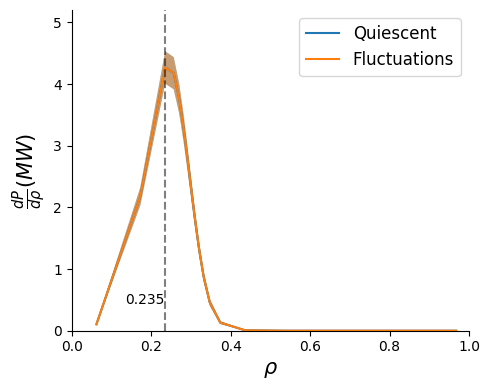

In [5]:
plt.figure(figsize=(5,4))
ax = plt.subplot(111)
ax.plot(rho_abs_nofluct, dP_drho_nofluct[:, 0], label='Quiescent')
ax.fill_between(rho_abs_nofluct, dP_drho_nofluct[:, 0]-dP_drho_nofluct[:, 1], dP_drho_nofluct[:, 0]+dP_drho_nofluct[:, 1], alpha=0.5)
ax.plot(rho_abs_fluct, dP_drho_fluct[:, 0], label='Fluctuations')
ax.fill_between(rho_abs_fluct, dP_drho_fluct[:, 0]-dP_drho_fluct[:, 1], dP_drho_fluct[:, 0]+dP_drho_fluct[:, 1], alpha=0.5)
ax.vlines(rho_abs_nofluct[np.argmax(dP_drho_nofluct[:, 0])], 0, 5.2, color='black', linestyle='--', alpha=0.5)
ax.annotate(f'{rho_abs_nofluct[np.argmax(dP_drho_nofluct[:, 0])]:.3f}', (rho_abs_nofluct[np.argmax(dP_drho_nofluct[:, 0])]-0.05, 0.2), textcoords="offset points", xytext=(0,10), ha='center')
ax.set_xlabel(r'$\rho$', fontsize=15)
ax.set_ylabel(r'$\frac{dP}{d\rho}(MW)$', fontsize=15)
ax.set_xlim([0, 1])
ax.set_ylim([0, 5.2])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(fontsize=12)
plt.tight_layout()

plt.show()



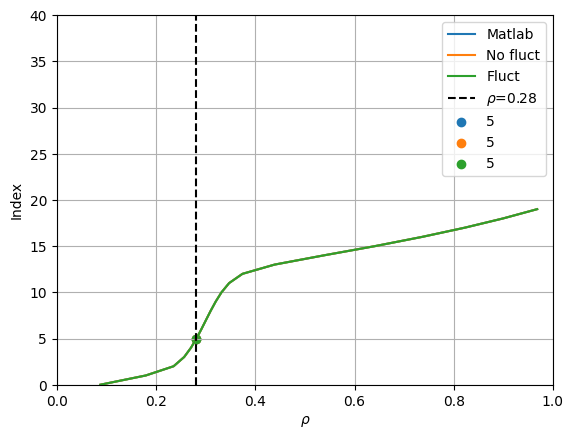

In [6]:
def closest_index(val):
    return np.argmin(np.abs(rho_mat- val)), np.argmin(np.abs(np.sqrt(psi)- val)), np.argmin(np.abs(np.sqrt(psi_fluct)- val))

# rho_goal is the rho value around which we want to compare the data for most plots.
rho_goal = 0.28

plt.figure()
len_mat = rho_mat.shape[0]
len_no_fluct = len(psi)
len_fluct = len(psi_fluct)

plt.plot(rho_mat, np.arange(len_mat), label='Matlab')
plt.plot(np.sqrt(psi), np.arange(len_no_fluct), label='No fluct')
plt.plot(np.sqrt(psi_fluct), np.arange(len_fluct), label='Fluct')
plt.axvline([rho_goal], color='k', linestyle='--', label=rf'$\rho$={rho_goal}')

i_mat, i_no_fluct, i_fluct = closest_index(rho_goal)

plt.scatter([rho_goal], [i_mat], label=f'{i_mat}')
plt.scatter([np.sqrt(psi[i_no_fluct])], [i_no_fluct], label=f'{i_no_fluct}')
plt.scatter([np.sqrt(psi_fluct[i_fluct])], [i_fluct], label=f'{i_fluct}')
plt.grid()
plt.xlabel(r'$\rho$')
plt.ylabel('Index')
plt.xlim(0, 1)
plt.ylim(0, 40)
plt.legend()
plt.show()



## Creating the full otput arrays from sparse data

In [7]:
# Create the full 1D array from the sparse data
QL_bounce_flat = np.zeros(p_norm_w.shape[0]*ksi0_h.shape[0]*psi.shape[0]*harmonics.shape[0])
QL_bounce_flat[QL_mask] = QL_bounce_sparse
QL_bounce = QL_bounce_flat.reshape((p_norm_w.shape[0], ksi0_h.shape[0], psi.shape[0], harmonics.shape[0]), order='F')
QL_bounce = np.transpose(QL_bounce, (1, 0, 2, 3))
print(QL_bounce.shape)

QL_bounce_flat_fluct = np.zeros(p_norm_w_fluct.shape[0]*ksi0_h_fluct.shape[0]*psi_fluct.shape[0]*harmonics_fluct.shape[0])
QL_bounce_flat_fluct[QL_mask_fluct] = QL_bounce_sparse_fluct
QL_bounce_fluct = QL_bounce_flat_fluct.reshape((p_norm_w_fluct.shape[0], ksi0_h_fluct.shape[0], psi_fluct.shape[0], harmonics_fluct.shape[0]), order='F')
QL_bounce_fluct = np.transpose(QL_bounce_fluct, (1, 0, 2, 3))
print(QL_bounce_fluct.shape)

(142, 121, 20, 1)
(142, 121, 20, 1)


In [8]:
Pnorm, Ksi0 = np.meshgrid(p_norm, ksi0)

Ppar, Pper = Pnorm*Ksi0, Pnorm*np.sqrt(1-Ksi0**2)
PPAR = np.repeat(np.expand_dims(Ppar, 2), len(psi), axis=2)
PPER = np.repeat(np.expand_dims(Pper, 2), len(psi), axis=2)
KSI0 = np.repeat(np.expand_dims(Ksi0, 2), len(psi), axis=2)

RHO = np.tile(np.sqrt(psi.T), (len(p_norm), len(ksi0),1))
RHO = np.transpose(RHO, (1, 0, 2))

#QL_bounce = np.sum(QL_bounce, axis=3)
#QL_bounce_fluct = np.sum(QL_bounce_fluct, axis=3)
QL_bounce = QL_bounce[:,:,:, 0]
QL_bounce_fluct = QL_bounce_fluct[:,:,:, 0]

print(QL_bounce.shape)
print(PPER.shape)
print(PPAR.shape)
print(RHO.shape)
print(KSI0.shape)

(142, 121, 20)
(142, 121, 20)
(142, 121, 20)
(142, 121, 20)
(142, 121, 20)


max_nofluct:0.0, min_nofluct:0.0


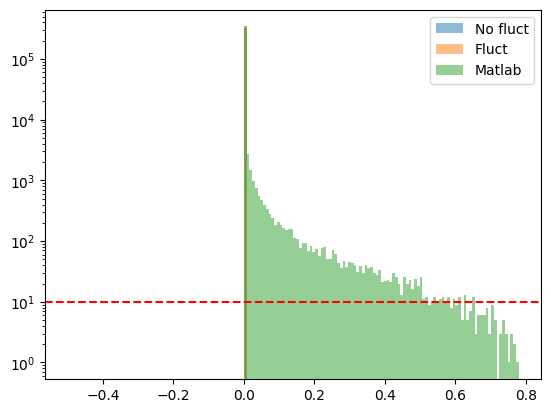

In [9]:
DRF_pp_nofluct = QL_bounce*(1-KSI0**2)
DRF_pp_fluct = QL_bounce_fluct*(1-KSI0**2)

max_nofluct = np.max(DRF_pp_nofluct)
min_nofluct = np.min(DRF_pp_nofluct)
print(f'max_nofluct:{max_nofluct}, min_nofluct:{min_nofluct}')

plt.figure()
freqbins = plt.hist(DRF_pp_nofluct.flatten(), bins=100, density=False, log=True, alpha=0.5, label='No fluct')
freqbins_fluct = plt.hist(DRF_pp_fluct.flatten(), bins=100, density=False, log=True, alpha=0.5, label='Fluct')
freqbins_mat = plt.hist(Drf_mat.flatten(), bins=100, density=False, log=True, alpha=0.5, label='Matlab')
plt.axhline(1e1, color='r', linestyle='--')
plt.legend()
plt.show()

## C3PO vs WKBeam_nofluct comparison

In [10]:
# Interpolate the calculated data and matlab data to the same grid
# Things below no longer needed, radial grids are the same for both data sets.
"""
x_comp = np.linspace(min(rho_mat), 0.9, 20)
psi_comp = x_comp**2
dpsi_comp = 1/2* (np.diff(psi_comp)[:-1] + np.diff(psi_comp)[1:])
dpsi_comp = np.concatenate(([np.diff(psi_comp)[0]], dpsi_comp, [np.diff(psi_comp)[-1]]))
Drf_mat_shifted = np.transpose(Drf_mat, (1, 0, 2))
print(Drf_mat_shifted.shape)
print(QL_bounce.shape)


DRF0_nofluct_int = RegularGridInterpolator((ksi0, p_norm, np.sqrt(psi)), DRF_pp_nofluct, bounds_error=False, fill_value=None)
Drf_mat_int = RegularGridInterpolator((Ksi0_mat[:, 1], Pnorm_mat[1, :], rho_mat), Drf_mat_shifted, bounds_error=False, fill_value=None)

RHO_mat= np.tile((x_comp), (len(p_norm), len(ksi0), 1))
RHO_mat = np.transpose(RHO_mat, (1, 0, 2))
print(RHO_mat.shape)
PPAR_mat = np.repeat(np.expand_dims(Ppar, 2), len(x_comp), axis=2)
PPER_mat = np.repeat(np.expand_dims(Pper, 2), len(x_comp), axis=2)
Ksi0_mat_interp = np.repeat(np.expand_dims(Ksi0, 2), len(x_comp), axis=2)
Pnorm_mat_interp = np.repeat(np.expand_dims(Pnorm, 2), len(x_comp), axis=2)
DRF0_nofluct_interp = DRF0_nofluct_int((Ksi0_mat_interp, Pnorm_mat_interp, RHO_mat))
Drf_mat_interp = Drf_mat_int((Ksi0_mat_interp, Pnorm_mat_interp, RHO_mat))
print(DRF0_nofluct_interp.shape)
print(Drf_mat_interp.shape)
max_mat_interp = np.max(Drf_mat_interp)
min_mat_interp = np.min(Drf_mat_interp)
max_nofluct_interp = np.max(DRF0_nofluct_interp)
min_nofluct_interp = np.min(DRF0_nofluct_interp)
print(max_mat_interp, min_mat_interp)
print(max_nofluct_interp, min_nofluct_interp)
"""



'\nx_comp = np.linspace(min(rho_mat), 0.9, 20)\npsi_comp = x_comp**2\ndpsi_comp = 1/2* (np.diff(psi_comp)[:-1] + np.diff(psi_comp)[1:])\ndpsi_comp = np.concatenate(([np.diff(psi_comp)[0]], dpsi_comp, [np.diff(psi_comp)[-1]]))\nDrf_mat_shifted = np.transpose(Drf_mat, (1, 0, 2))\nprint(Drf_mat_shifted.shape)\nprint(QL_bounce.shape)\n\n\nDRF0_nofluct_int = RegularGridInterpolator((ksi0, p_norm, np.sqrt(psi)), DRF_pp_nofluct, bounds_error=False, fill_value=None)\nDrf_mat_int = RegularGridInterpolator((Ksi0_mat[:, 1], Pnorm_mat[1, :], rho_mat), Drf_mat_shifted, bounds_error=False, fill_value=None)\n\nRHO_mat= np.tile((x_comp), (len(p_norm), len(ksi0), 1))\nRHO_mat = np.transpose(RHO_mat, (1, 0, 2))\nprint(RHO_mat.shape)\nPPAR_mat = np.repeat(np.expand_dims(Ppar, 2), len(x_comp), axis=2)\nPPER_mat = np.repeat(np.expand_dims(Pper, 2), len(x_comp), axis=2)\nKsi0_mat_interp = np.repeat(np.expand_dims(Ksi0, 2), len(x_comp), axis=2)\nPnorm_mat_interp = np.repeat(np.expand_dims(Pnorm, 2), len(x_co

<Figure size 640x480 with 0 Axes>

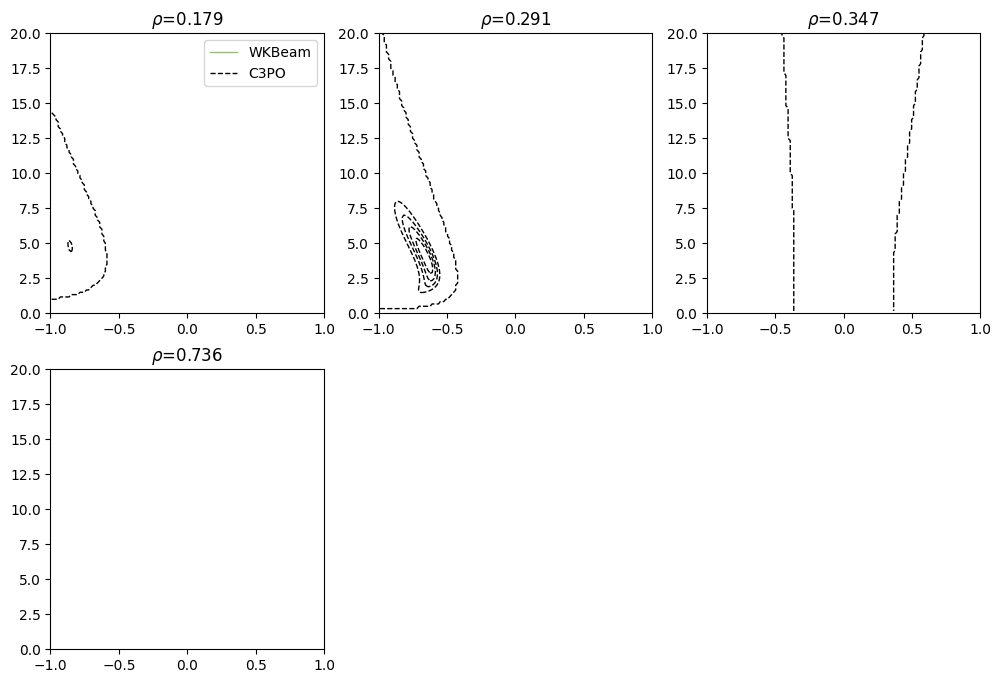

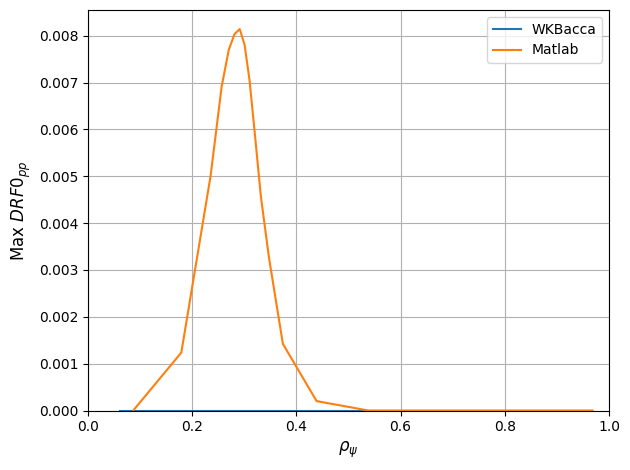

In [11]:
max_nofluct = np.max(DRF_pp_nofluct)
min_nofluct = np.min(DRF_pp_nofluct)
max_mat = np.max(Drf_mat)
min_mat = np.min(Drf_mat)

plt.figure()
plt.figure(figsize=(12, 8))
plotindex = 1
for i in range(1, len(psi), 5):
    ax = plt.subplot(2, 3, plotindex)
    plotindex += 1
    #ax.pcolormesh(ksi0, p_norm,DRF_pp_nofluct[:, :, i].T, cmap=parula_map, vmin=min_nofluct, vmax=max_nofluct)
    ax.contour(ksi0, p_norm, DRF_pp_nofluct[:, :, i].T, np.linspace(min_mat, max_mat, 7), cmap=parula_map, linestyles='-', linewidths=1)

    ax.contour(ksi0, p_norm[1:], Drf_mat[:, :, i], np.linspace(min_mat, max_mat, 7), colors='k', linestyles='dashed', linewidths=1)
    ax.set_ylim(0, p_max)
    ax.set_xlim(-1, 1)
    ax.set_title(rf'$\rho$={np.sqrt(psi[i]):.3f}')

    if plotindex == 2:
        h1 = plt.Line2D([0], [0], color=cm_data[40], linestyle='-', linewidth=1, label='WKBeam') 
        h2 = plt.Line2D([0], [0], color='k', linestyle='dashed', linewidth=1, label='C3PO')
        ax.legend(handles=[h1, h2])

plt.show()

plt.figure()
plt.plot(rho_abs_nofluct, np.mean(DRF_pp_nofluct[:, :, :], axis=(0, 1)), label='WKBacca')
plt.plot(rho_mat, np.mean(Drf_mat[:, :, :], axis=(0, 1)), label='Matlab')
plt.xlabel(r'$\rho_{\psi}$', fontsize=12)
plt.ylabel('Max $DRF0_{pp}$', fontsize=12)
plt.xlim([0, 1])
plt.ylim(0)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Fluct vs Nofluct comparison

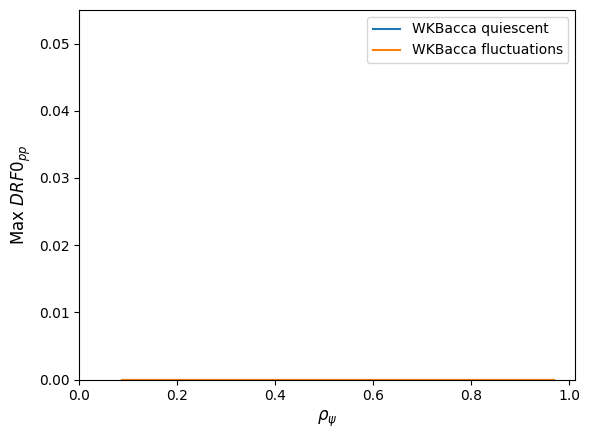

In [12]:
plt.figure()
ax = plt.subplot(111)
ax.plot(np.sqrt(psi), np.amax(DRF_pp_nofluct, axis=(0, 1)), label='WKBacca quiescent')
ax.plot(np.sqrt(psi), np.amax(DRF_pp_fluct, axis=(0, 1)), label='WKBacca fluctuations')
ax.vlines([np.sqrt(psi)], 0, np.amax(DRF_pp_nofluct), color='k', linestyle='--', linewidth=0.2)
ax.set_xlim(0)
ax.set_ylim(0)
ax.set_ylabel('Max $DRF0_{pp}$', fontsize=12)   
ax.set_xlabel(r'$\rho_{\psi}$', fontsize=12)
plt.legend()
#plt.grid()
plt.show()

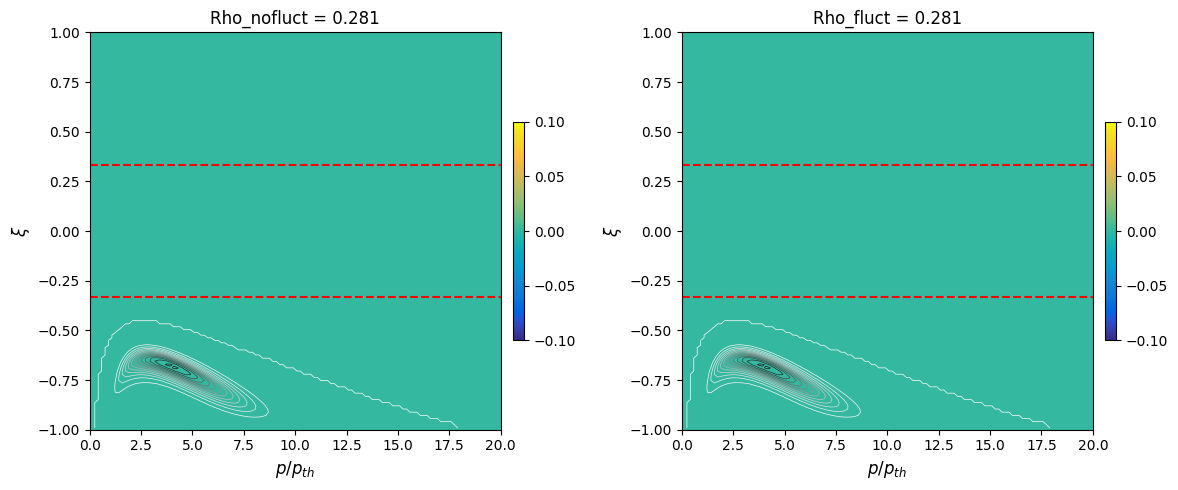

Max discrepancy: 0.0


In [13]:
plt.figure(figsize=(12, 5))
ax = plt.subplot(121)

fig = ax.pcolormesh(Pnorm, Ksi0, DRF_pp_nofluct[:,:,i_no_fluct], cmap=parula_map, vmin=min_nofluct, vmax=max_nofluct)#, edgecolors='k')
fig2 = ax.contour(Pnorm_mat, Ksi0_mat, Drf_mat[:,:,i_mat].T, levels=np.linspace(min_mat, max_mat, 15), cmap='Greys', linewidths=0.5)

colorbar = plt.colorbar(fig, orientation='vertical', pad=.025, shrink=.55)

ax.axhline(Trapksi0[i_no_fluct], color='r', linestyle='--')
ax.axhline(-Trapksi0[i_no_fluct], color='r', linestyle='--')
ax.set_xlabel(r'$p/p_{th}$', size=12)
ax.set_ylabel(r'$\xi$', size=12)
ax.set_ylim(-1, 1)
ax.set_xlim(0, p_max)
ax.set_title(f'Rho_nofluct = {np.sqrt(psi[i_no_fluct]):.3}')

ax = plt.subplot(122)
fig = ax.pcolormesh(Pnorm, Ksi0, DRF_pp_fluct[:,:,i_fluct], cmap=parula_map, vmin=min_nofluct, vmax=max_nofluct)
fig2 = ax.contour(Pnorm_mat, Ksi0_mat, Drf_mat[:,:,i_mat].T, levels=np.linspace(min_mat, max_mat, 15), cmap='Greys', linewidths=0.5)

colorbar = plt.colorbar(fig, orientation='vertical', pad=.025, shrink=.55)

ax.axhline(Trapksi0_fluct[i_fluct], color='r', linestyle='--')
ax.axhline(-Trapksi0_fluct[i_fluct], color='r', linestyle='--')
ax.set_xlabel(r'$p/p_{th}$', size=12)
ax.set_ylabel(r'$\xi$', size=12)
ax.set_ylim(-1, 1)
ax.set_xlim(0, p_max)
ax.set_title(f'Rho_fluct = {np.sqrt(psi_fluct[i_fluct]):.3}')

plt.tight_layout()
plt.show()

print(f'Max discrepancy: {np.max(DRF_pp_nofluct[i_no_fluct]/np.amax(Drf_mat[:,:,i_mat].T))}')

In [14]:
def Trapping_line(p_par, Trapksi0, i_psi):
    #Trapping line, giving p_perp_Trap = p_par_Trap * sqrt(1 - ksi0_T^2)/ksi0_T*sign(p_par_Trap)
    return np.sign(p_par) * p_par * np.sqrt(1 - Trapksi0[i_psi]**2)/Trapksi0[i_psi]


/tmp/ipykernel_3104969/3202997299.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  fig1 = ax.pcolormesh(PPAR[:,:,i_no_fluct], PPER[:,:,i_no_fluct], DRF_pp_nofluct[:,:,i_no_fluct], cmap=parula_map, vmin=min_nofluct, vmax=max_nofluct)#, edgecolors='k')
/tmp/ipykernel_3104969/3202997299.py:24: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  fig3 = ax2.pcolormesh(PPAR[:,:,i_fluct], PPER[:,:,i_fluct], DRF_pp_fluct[:,:,i_fluct], cmap=parula_map, vmin=min_nofluct, vmax=max_nofluct)


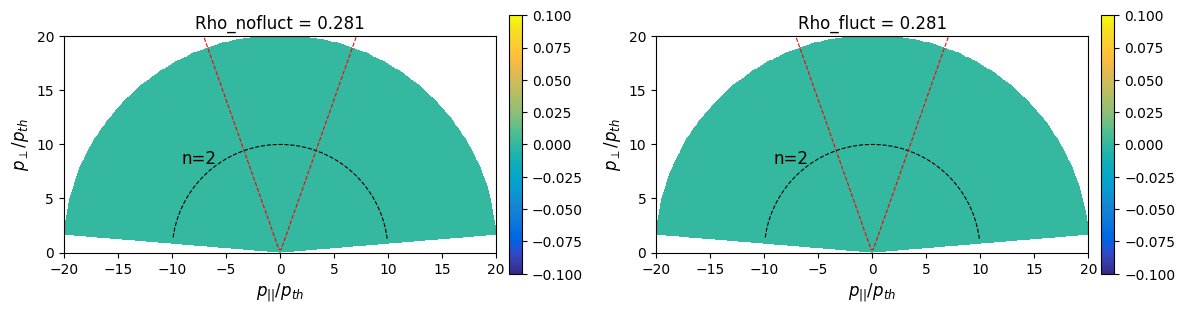

In [15]:
plt.figure(figsize=(12, 5))
ax = plt.subplot(121)

fig1 = ax.pcolormesh(PPAR[:,:,i_no_fluct], PPER[:,:,i_no_fluct], DRF_pp_nofluct[:,:,i_no_fluct], cmap=parula_map, vmin=min_nofluct, vmax=max_nofluct)#, edgecolors='k')
#fig1 = ax.contourf(PPAR[:,:,i_no_fluct], PPER[:,:,i_no_fluct], DRF_pp_nofluct[:,:,i_no_fluct], levels=np.linspace(min_nofluct, max_nofluct, 105), cmap=parula_map)
#fig2 = ax.contour(Ppar_mat, Pper_mat, Drf_mat[:,:,i_mat].T, levels=np.linspace(min_mat, max_mat, 7), cmap='Greys', linewidths=0.7)
colorbar = plt.colorbar(fig1, orientation='vertical', pad=.025, shrink=.55)

plt.contour(PPAR[:,:,i_no_fluct], PPER[:,:,i_no_fluct], Pnorm, levels=[10, 20, 29.99], colors='black', linestyles='dashed', linewidths=0.8)
plt.annotate(r'n=2', xy=(-10, 8), xytext=(7, 2), textcoords='offset points', fontsize=12)
#plt.annotate(r'n=3', xy=(13, 16), xytext=(7, 2), textcoords='offset points', fontsize=12)

p_perp_Trap = Trapping_line(np.linspace(-p_max, p_max, 200), Trapksi0, i_no_fluct)
plt.plot(np.linspace(-p_max, p_max, 200), p_perp_Trap, color='r', linestyle='--', linewidth=0.8)

ax.set_xlabel(r'$p_{||}/p_{th}$', size=12)
ax.set_ylabel(r'$p_{\perp}/p_{th}$', size=12)
ax.set_ylim(0, p_max)
ax.set_xlim(-p_max, p_max)
ax.set_aspect('equal')
ax.set_title(f'Rho_nofluct = {np.sqrt(psi[i_no_fluct]):.3f}')

ax2 = plt.subplot(122)
fig3 = ax2.pcolormesh(PPAR[:,:,i_fluct], PPER[:,:,i_fluct], DRF_pp_fluct[:,:,i_fluct], cmap=parula_map, vmin=min_nofluct, vmax=max_nofluct)
#fig3 = ax.contourf(PPAR[:,:,i_fluct], PPER[:,:,i_fluct], DRF_pp_fluct[:,:,i_fluct], levels=np.linspace(min_nofluct, max_nofluct, 105), cmap=parula_map)
#fig4 = ax2.contour(Ppar_mat, Pper_mat, Drf_mat[:,:,i_mat].T, levels=np.linspace(min_mat, max_mat, 7), cmap='Greys', linewidths=0.7)
colorbar = plt.colorbar(fig3, orientation='vertical', pad=.025, shrink=.55)

plt.contour(PPAR[:,:,i_fluct], PPER[:,:,i_fluct], Pnorm, levels=[10, 20, 29.99], colors='black', linestyles='dashed', linewidths=0.8)
plt.annotate(r'n=2', xy=(-10, 8), xytext=(7, 2), textcoords='offset points', fontsize=12)
#plt.annotate(r'n=3', xy=(13, 16), xytext=(7, 2), textcoords='offset points', fontsize=12)

p_perp_Trap = Trapping_line(np.linspace(-p_max, p_max, 200), Trapksi0_fluct, i_fluct)
plt.plot(np.linspace(-p_max, p_max, 200), p_perp_Trap, color='r', linestyle='--', linewidth=0.8)

ax2.set_xlabel(r'$p_{||}/p_{th}$', size=12)
ax2.set_ylabel(r'$p_{\perp}/p_{th}$', size=12)
ax2.set_ylim(0, p_max)
ax2.set_xlim(-p_max, p_max)
ax2.set_aspect('equal')
ax2.set_title(f'Rho_fluct = {np.sqrt(psi_fluct[i_fluct]):.3f}')

plt.tight_layout()
plt.show()



## 3D plots

In [16]:
# Here, we again prefer to use the sparse data for 3D scatter plots!
# So create flat arrays for the dimensions

rho_flat = np.tile(np.sqrt(psi), (len(p_norm), len(ksi0), len(harmonics), 1))
rho_flat = np.transpose(rho_flat, (0, 1, 3, 2)).flatten(order='F')
p_norm_flat = np.tile(p_norm, (len(ksi0), len(psi), len(harmonics), 1)) 
p_norm_flat = np.transpose(p_norm_flat, (3, 0, 1, 2)).flatten(order='F')
ksi0_flat = np.tile(ksi0, (len(p_norm), len(psi), len(harmonics), 1))
ksi0_flat = np.transpose(ksi0_flat, (0, 3, 1, 2)).flatten(order='F')
harmonics_flat = np.tile(harmonics, (len(p_norm), len(ksi0), len(psi), 1))
harmonics_flat = np.transpose(harmonics_flat, (0, 1, 2, 3)).flatten(order='F')


# To filter out the wanted harmonics:
harmonics_to_show = [2]

# For the nofluct case
rho_values_sparse = rho_flat[QL_mask]
p_norm_values_sparse = p_norm_flat[QL_mask]
ksi0_values_sparse = ksi0_flat[QL_mask]
harmonics_values_sparse = harmonics_flat[QL_mask]
#
ppar_values_sparse = p_norm_values_sparse*ksi0_values_sparse
pper_values_sparse = p_norm_values_sparse*np.sqrt(1-ksi0_values_sparse**2)
#
#
rho_values_toshow = rho_values_sparse[np.isin(harmonics_values_sparse, harmonics_to_show)]
p_norm_values_toshow = p_norm_values_sparse[np.isin(harmonics_values_sparse, harmonics_to_show)]
ksi0_values_toshow = ksi0_values_sparse[np.isin(harmonics_values_sparse, harmonics_to_show)]
#
ppar_values_toshow = ppar_values_sparse[np.isin(harmonics_values_sparse, harmonics_to_show)]
pper_values_toshow = pper_values_sparse[np.isin(harmonics_values_sparse, harmonics_to_show)]
#
QL_values_toshow = np.expand_dims(QL_bounce_sparse, axis=0)[np.isin(harmonics_values_sparse, harmonics_to_show)]
# Create Drf_pp from QL
DRF_pp_toshow = QL_values_toshow*(1-ksi0_values_toshow**2)
# Normalize the Drf_pp values
DRF_pp_toshow = DRF_pp_toshow/np.max(DRF_pp_toshow)

# For the fluct case
rho_values_sparse_fluct = rho_flat[QL_mask_fluct]
p_norm_values_sparse_fluct = p_norm_flat[QL_mask_fluct]
ksi0_values_sparse_fluct = ksi0_flat[QL_mask_fluct]
harmonics_values_sparse_fluct = harmonics_flat[QL_mask_fluct]
#
ppar_values_sparse_fluct = p_norm_values_sparse_fluct*ksi0_values_sparse_fluct
pper_values_sparse_fluct = p_norm_values_sparse_fluct*np.sqrt(1-ksi0_values_sparse_fluct**2)
#
#
rho_values_toshow_fluct = rho_values_sparse_fluct[np.isin(harmonics_values_sparse_fluct, harmonics_to_show)]
p_norm_values_toshow_fluct = p_norm_values_sparse_fluct[np.isin(harmonics_values_sparse_fluct, harmonics_to_show)]
ksi0_values_toshow_fluct = ksi0_values_sparse_fluct[np.isin(harmonics_values_sparse_fluct, harmonics_to_show)]
#
ppar_values_toshow_fluct = ppar_values_sparse_fluct[np.isin(harmonics_values_sparse_fluct, harmonics_to_show)]
pper_values_toshow_fluct = pper_values_sparse_fluct[np.isin(harmonics_values_sparse_fluct, harmonics_to_show)]
#
QL_values_toshow_fluct = np.expand_dims(QL_bounce_sparse_fluct, axis=0)[np.isin(harmonics_values_sparse_fluct, harmonics_to_show)]
# Create Drf_pp from QL
DRF_pp_fluct_toshow = QL_values_toshow_fluct*(1-ksi0_values_toshow_fluct**2)
# Normalize the Drf_pp values to non-fluctuating case
DRF_pp_fluct_toshow = DRF_pp_fluct_toshow/np.max(DRF_pp_toshow)

ValueError: zero-size array to reduction operation maximum which has no identity

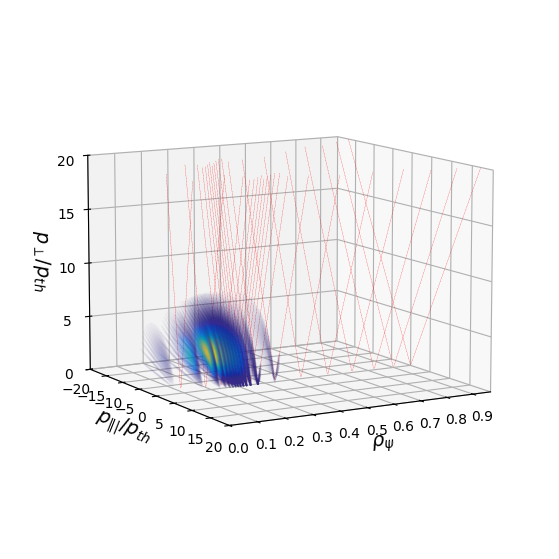

In [ ]:
# 3D plot of the QL_bounce

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rho_values_toshow, ppar_values_toshow, pper_values_toshow, c=DRF_pp_toshow, cmap=parula_map, s=10*DRF_pp_toshow**0.5, alpha=.05)

# Plot a vertical surface
"""
rho = RHO[i, 0, 0]
ax.plot_surface(np.tile(rho, (len(p_norm), len(ksi0_h))).T, PPAR[i], PPER[i], alpha=0.5, color='grey')
ax.plot([rho, rho], [-16, 16], [-.5, -0.5], color='black', linestyle='dashed', linewidth=1)
ax.plot([rho, rho], [-16, -16], [-.5, 16], color='black', linestyle='dashed', linewidth=1)
"""

# Plot the trapping line at every rho
p_par_T = np.linspace(-p_max, p_max, 200)
for i in range(0, len(psi)):
    p_perp_T = Trapping_line(p_par_T, Trapksi0, i)
    # Cut the line short when it would leave the box
    p_perp_T_toplot = p_perp_T[(p_perp_T > 0) & (p_perp_T < p_max)]
    p_par_T_toplot = p_par_T[(p_perp_T > 0) & (p_perp_T < p_max)]
    ax.plot(np.sqrt(psi[i])*np.ones_like(p_par_T_toplot), p_par_T_toplot, p_perp_T_toplot, color='r', linestyle='--', linewidth=0.2)

ax.set_xlabel(r'$\rho_{\psi}$', fontsize= 14)
ax.set_ylabel(r'$p_{\||}/p_{th}$' , fontsize= 14)
ax.set_zlabel(r'$p_{\perp}/p_{th}$', fontsize= 14, rotation=180)

ax.set_xlim([rho_max, 0])
ax.set_xticks(np.arange(0, rho_max, 0.1))
ax.set_ylim([-p_max, p_max])
ax.set_yticks(np.arange(-p_max, p_max+1, 5))
ax.set_zlim([0, p_max])
ax.set_zticks(np.arange(0, p_max+1, 5))

ax.view_init(elev=10, azim=60)
ax.set_box_aspect(None, zoom=0.85)
plt.show()

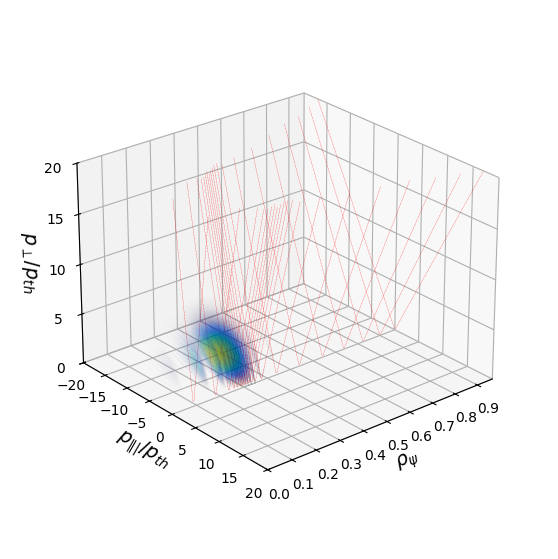

In [ ]:
# 3D plot of the QL_bounce

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rho_values_toshow_fluct, ppar_values_toshow_fluct, pper_values_toshow_fluct, c=DRF_pp_fluct_toshow, cmap=parula_map, s=1e2*DRF_pp_fluct_toshow, alpha=.01)

# Plot a vertical surface
"""
rho = RHO[i, 0, 0]
ax.plot_surface(np.tile(rho, (len(p_norm), len(ksi0_h))).T, PPAR[i], PPER[i], alpha=0.5, color='grey')
ax.plot([rho, rho], [-16, 16], [-.5, -0.5], color='black', linestyle='dashed', linewidth=1)
ax.plot([rho, rho], [-16, -16], [-.5, 16], color='black', linestyle='dashed', linewidth=1)
"""

# Plot the trapping line at every rho
p_par_T = np.linspace(-p_max, p_max, 200)
for i in range(0, len(psi)):
    p_perp_T = Trapping_line(p_par_T, Trapksi0_fluct, i)
    # Cut the line short when it would leave the box
    p_perp_T_toplot = p_perp_T[(p_perp_T > 0) & (p_perp_T < p_max)]
    p_par_T_toplot = p_par_T[(p_perp_T > 0) & (p_perp_T < p_max)]
    ax.plot(np.sqrt(psi[i])*np.ones_like(p_par_T_toplot), p_par_T_toplot, p_perp_T_toplot, color='r', linestyle='--', linewidth=0.2)

ax.set_xlabel(r'$\rho_{\psi}$', fontsize= 14)
ax.set_ylabel(r'$p_{\||}/p_{th}$' , fontsize= 14)
ax.set_zlabel(r'$p_{\perp}/p_{th}$', fontsize= 14, rotation=180)

ax.set_xlim([rho_max, 0])
ax.set_xticks(np.arange(0, rho_max, 0.1))
ax.set_ylim([-p_max, p_max])
ax.set_yticks(np.arange(-p_max, p_max+1, 5))
ax.set_zlim([0, p_max])
ax.set_zticks(np.arange(0, p_max+1, 5))

ax.view_init(elev=25, azim=50)
ax.set_box_aspect(None, zoom=0.85)
#ax.set_axis_off()
plt.show()